# 산술 연산 - add 기본

In [14]:
import numpy as np
import cv2
import sys
import os

src = cv2.imread('./fig/lenna.bmp', 1)

if src is None:
    print('image read failed')

## 두 가지 방법
#1
dst = np.clip(src + 100.0, 0 ,255).astype(np.uint8)

#2
dst = cv2.add(src, (100, 100, 100, 0))  # 마지막 0은 alpha 채널
print(dst.dtype)
print(dst.shape)


cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

uint8
(512, 512, 3)


# 산술 연산 - add, addweighted, sub, absdiff

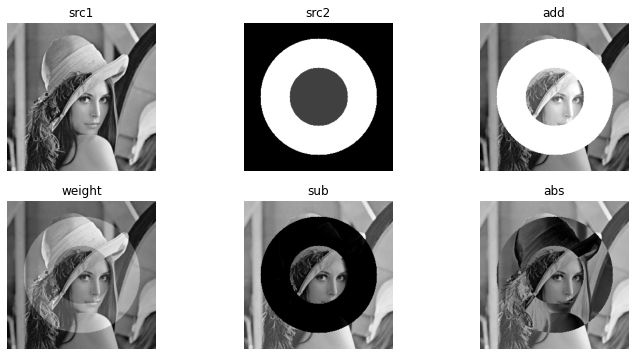

In [33]:
import numpy as np
import cv2
import sys
import os
import matplotlib.pyplot as plt

src1 = cv2.imread('./fig/lenna256.bmp', 0)
src2 = np.zeros((256, 256), np.uint8)

cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
# addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst
# alpha + beta = 1 이 되야함
dst2 = cv2.addWeighted(src1, 0.8, src2, 0.2, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)

# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)

plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(src1, cmap = 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap = 'gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst1, cmap = 'gray'), plt.axis('off'), plt.title('add')
plt.subplot(234), plt.imshow(dst2, cmap = 'gray'), plt.axis('off'), plt.title('weight')
plt.subplot(235), plt.imshow(dst3, cmap = 'gray'), plt.axis('off'), plt.title('sub')
plt.subplot(236), plt.imshow(dst4, cmap = 'gray'), plt.axis('off'), plt.title('abs')

cv2.waitKey()
cv2.destroyAllWindows()

# 산술 연산 - bitwise

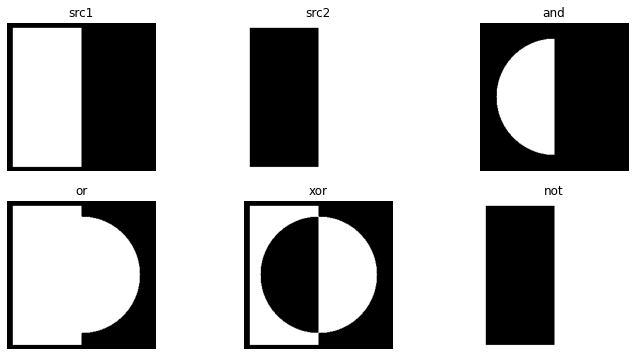

In [39]:
import numpy as np
import cv2
import sys
import os
import matplotlib.pyplot as plt

src1 = np.zeros((256, 256), np.uint8)
cv2.rectangle(src1, (10, 10), (127, 248), 255, -1)

src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 255, -1)

dst_bit_and = cv2.bitwise_and(src1, src2)
dst_bit_or = cv2.bitwise_or(src1, src2)
dst_bit_xor = cv2.bitwise_xor(src1, src2)
dst_bit_not = cv2.bitwise_not(src1, src2)

# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('dst_bit_and', dst_bit_and)
# cv2.imshow('dst_bit_or', dst_bit_or)
# cv2.imshow('dst_bit_xor', dst_bit_xor)
# cv2.imshow('dst_bit_not', dst_bit_not)

plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(src1, cmap = 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap = 'gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst_bit_and, cmap = 'gray'), plt.axis('off'), plt.title('and')
plt.subplot(234), plt.imshow(dst_bit_or, cmap = 'gray'), plt.axis('off'), plt.title('or')
plt.subplot(235), plt.imshow(dst_bit_xor, cmap = 'gray'), plt.axis('off'), plt.title('xor')
plt.subplot(236), plt.imshow(dst_bit_not, cmap = 'gray'), plt.axis('off'), plt.title('not')


cv2.waitKey()
cv2.destroyAllWindows()

In [49]:
import numpy as np
import cv2
import sys
import os
import matplotlib.pyplot as plt

src = cv2.imread('./fig/flowers.jpg', 1)

b, g, r = cv2.split(src)

b_plane = src[:, :, 0]
g_plane = src[:, :, 1]
r_plane = src[:, :, 2]
# print(type(b))
# print(b.shape)

dst = cv2.merge((b, g, r))

cv2.imshow('src', src)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.imshow('dst', dst)
cv2.imshow('b_plane', b_plane)

cv2.waitKey()
cv2.destroyAllWindows()

In [55]:
import numpy as np
import cv2
import sys
import os
import matplotlib.pyplot as plt

src = cv2.imread('./fig/flowers.jpg', 1)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv)

h_plane = src[:, :, 0]
s_plane = src[:, :, 1]
v_plane = src[:, :, 2]
# print(type(b))
# print(b.shape)

dst = cv2.merge((h, s, v))

cv2.imshow('src', src)
cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

# 히스토그램

(512, 512)


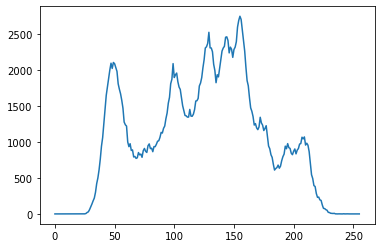

In [58]:
# gray
import numpy as np
import cv2
import sys
import os
import matplotlib.pyplot as plt

src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_GRAYSCALE)
print(src.shape)
histogram = cv2.calcHist([src], [0], None, [256], [0, 256])

plt.plot(histogram)
plt.show()
cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

(512, 512, 3)


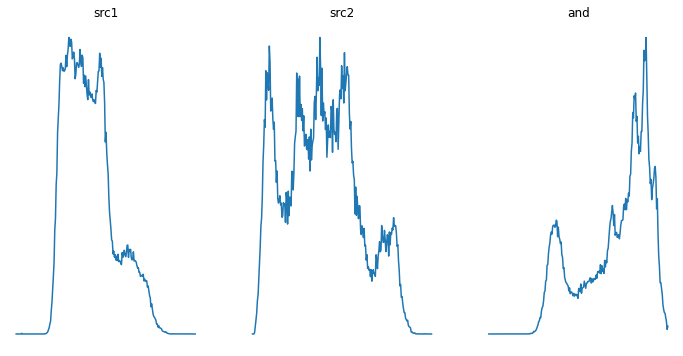

In [61]:
# color 1
import numpy as np
import cv2
import sys
import os
import matplotlib.pyplot as plt

src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_COLOR)
print(src.shape)

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])


plt.figure(figsize=(12, 6))
plt.subplot(131), plt.plot(hist_b), plt.axis('off'), plt.title('src1')
plt.subplot(132), plt.plot(hist_g), plt.axis('off'), plt.title('src2')
plt.subplot(133), plt.plot(hist_r), plt.axis('off'), plt.title('and')

plt.show()
cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

In [65]:
# grey
import numpy as np
import cv2
import sys
import os
import matplotlib.pyplot as plt

def getGrayHistImage(hist):
    imgHist = np.full((200, 256), 255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 200)
        pt2 = (x, 200 - int(hist[x, 0] * 200 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)

    return imgHist
        
        
src = cv2.imread('./fig/lenna.bmp', 0)
print(src.shape)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

histImg = getGrayHistImage(hist)


cv2.imshow('src', src)
cv2.imshow('histImg', histImg)

cv2.waitKey()
cv2.destroyAllWindows()

(512, 512)
